# Possible Correlation Between Life Expectancy and GDP

### Introduction

I will analyze data about the life expectancy and gross domestic product (GDP) from six different countries: Chile, China, Germany, Mexico, United States and Zimbabwe. The aim is to investigate whether or not there is a possible correlation between GDP and life expectancy.

### Import

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [3]:
df = pd.read_csv('all_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


### Cleaning

In [4]:
df.rename(columns = {'Life expectancy at birth (years)': 'Life'}, inplace = True)

### Correlation between GDP and Life Expectancy, All Countries

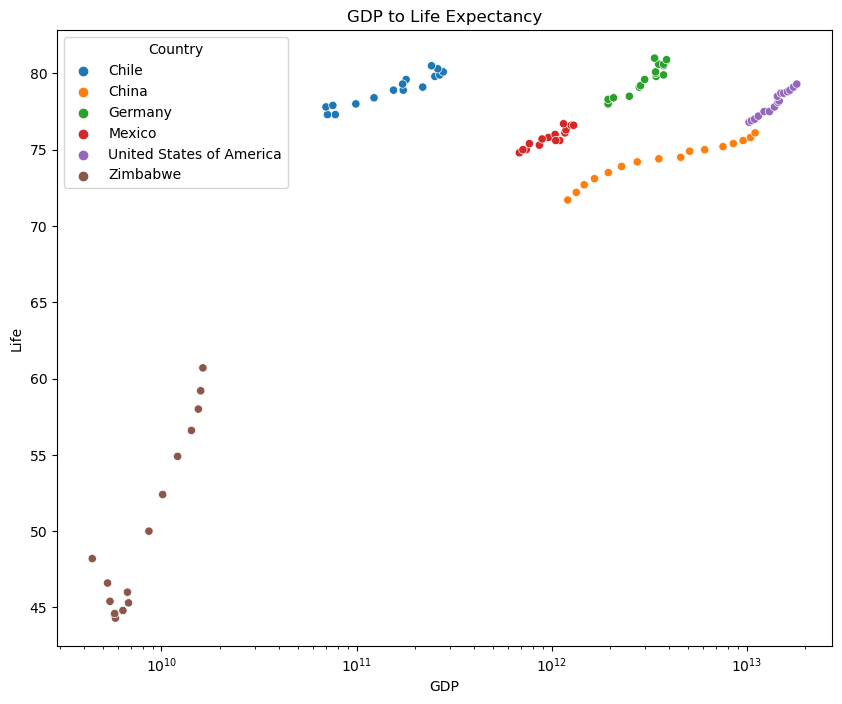

<Figure size 640x480 with 0 Axes>

In [5]:
plt.figure(figsize = (10,8))
ax = sns.scatterplot(data = df, x = 'GDP', y = 'Life',  hue = 'Country')
ax.set_title('GDP to Life Expectancy')
ax.set(xscale = 'log')
plt.show()
plt.clf()

### Observations

1. There is a drop in Zimbabwe's life expectancy with GDP growth before it consistently grows. More historical research is needed to find a possible answer.
2. If focusing on each individual country, a correlation between GDP and life expectancy is seen by the linear growth in each section of the scatter plot.
3. Larger absolute GDPs does not necessarily mean larger life expectancies. 


### Individual Country Plots

                    Country  Correlation GDP vs Life Expectancy
0                     Chile                            0.949877
1                     China                            0.908526
2                   Germany                            0.932699
3                    Mexico                            0.932238
4  United States of America                            0.981709
5                  Zimbabwe                            0.966200


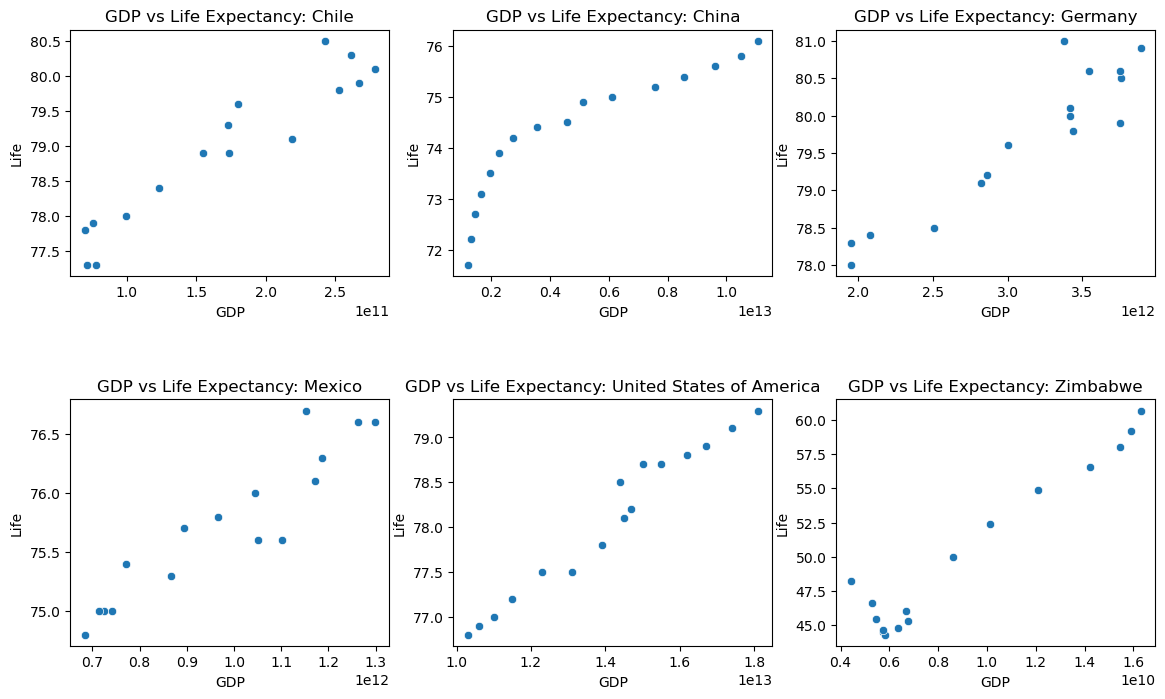

In [6]:
plt.figure(figsize = (14,8))
countries = df.Country.unique()
corr_list = []
for i in range(len(countries)):
    data_country = df[df.Country == countries[i]]
    ax = plt.subplot(2,3,(i+1))
    sns.scatterplot(data = data_country, x = 'GDP', y = 'Life')
    ax.set_title('GDP vs Life Expectancy: {country}'.format(country = countries[i]))
    corr, p = pearsonr(data_country.GDP, data_country.Life)
    corr_list.append(corr)
    plt.subplots_adjust(hspace = 0.5)
corr_countries = zip(countries, corr_list)
corr_df = pd.DataFrame(corr_countries, columns = ['Country', 'Correlation GDP vs Life Expectancy'])
print(corr_df)
corr_list = corr_df['Correlation GDP vs Life Expectancy'].tolist()

### Observations

1. Each plot shows a correlation between GDP and Life Expectancy.
2. All Pearson coeffecients are higher than 0.9, showing a strong correlation.

### Evolution of Life Expectancy Over Time

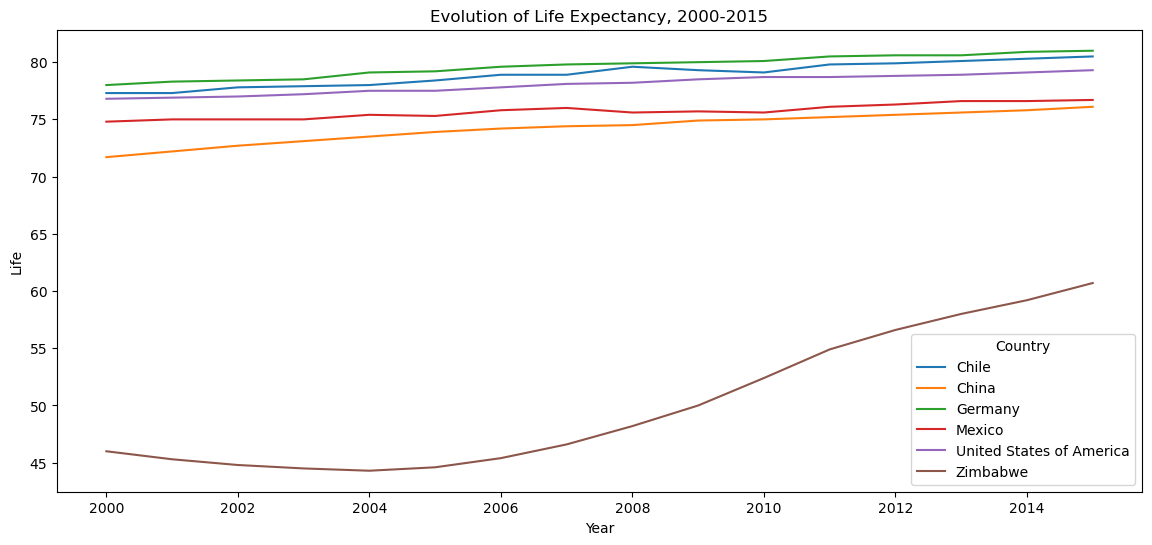

In [7]:
plt.figure(figsize=(14,6))
ax1 = sns.lineplot(data=df, x='Year', y='Life', hue='Country')
ax1.set_title('Evolution of Life Expectancy, 2000-2015')
plt.show()

### Evolution of GDP Over Time

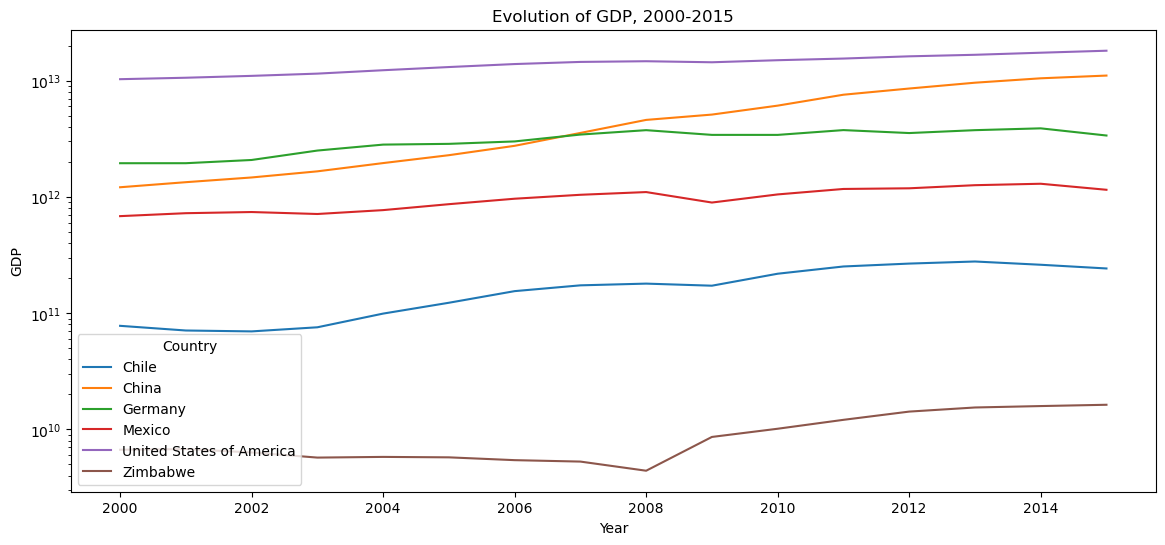

In [8]:
plt.figure(figsize=(14, 6))
ax2 = sns.lineplot(data=df, x='Year', y='GDP', hue='Country')
ax2.set_title('Evolution of GDP, 2000-2015')
ax2.set(yscale='log')
plt.show()

### Conclusions

1. There is a strong correlation between GDP and life expectancy.
2. There are important difference in the way countries translate their economical power to improved life expectancy, even if GDP is taken as a relative measure. These differences may be better explained by other variables not taken into account in this study, such as the cultural traits and health system organization of each country.